In [1]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from psycopg2.extras import execute_values
import seaborn as sns

In [2]:
# database connection
db_config = {
    'user': 'postgres',
    'password': 'postgres',
    'host': 'localhost',
    'port': '5432',
    'database': 'postgres'
}

# sql engine
connection_str = f'postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}'
engine = create_engine(connection_str)

In [10]:
query = '''SELECT 
    mfd.reaction_category AS reaction_category,
    fc.sex_updated,
    COUNT(*) AS count
    FROM 
        merged_faers_data_new mfd
    JOIN 
        faers_cases fc ON mfd.primaryid = fc.primaryid and fc.caseid = mfd.caseid
        where upper(fc.sex_updated) != 'UNK'
    GROUP BY 
        mfd.reaction_category, fc.sex_updated
    ORDER BY 
        1,2;'''

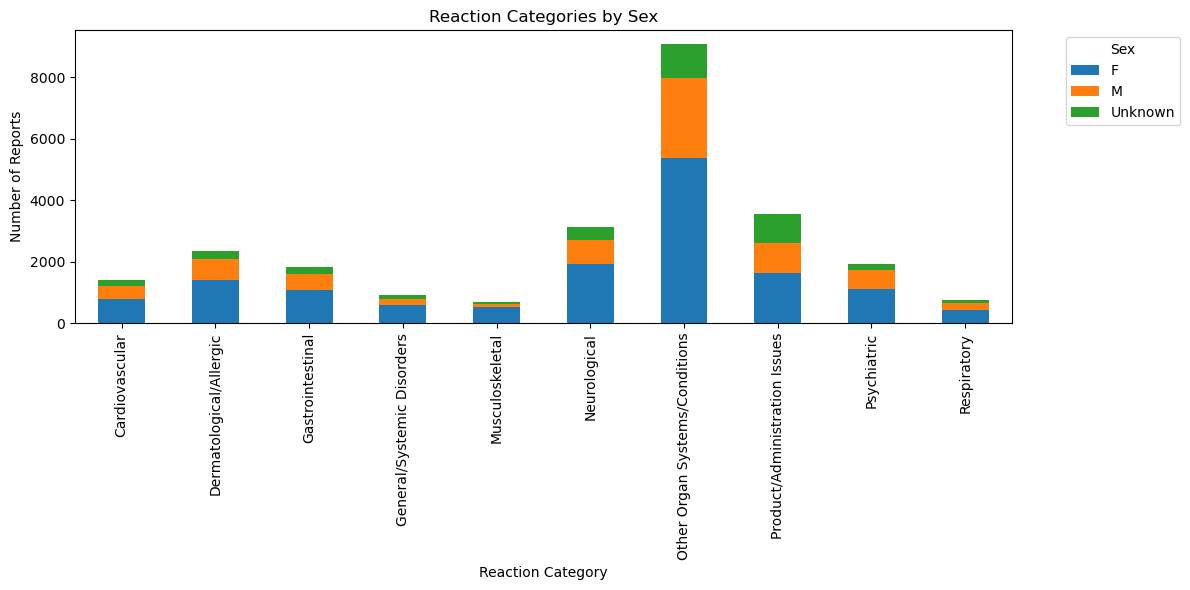

In [11]:
df = pd.read_sql(query, engine)
pivot = df.pivot_table(index='reaction_category', columns='sex_updated', values='count', aggfunc='sum').fillna(0)
pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Reaction Categories by Sex')
plt.xlabel('Reaction Category')
plt.ylabel('Number of Reports')
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Final Reaction Category By Sex", dpi=300, bbox_inches='tight')
plt.show()

In [17]:
query2 = '''SELECT 
    reaction_category AS reaction_category,
    case 
    when age >= 18 and age <= 64 then 'Adult'
    when age >= 65 then 'Elderly'
    when age <= 2 then 'Infant'
    when age <= 11 then 'Child'
    when age >= 12 and age  <= 17 then 'Adolescent' end as age_group,
    COUNT(*) AS count
FROM 
    merged_faers_data_new mfd
GROUP BY 
    reaction_category, age_group
ORDER BY 
    reaction_category, age_group;
'''

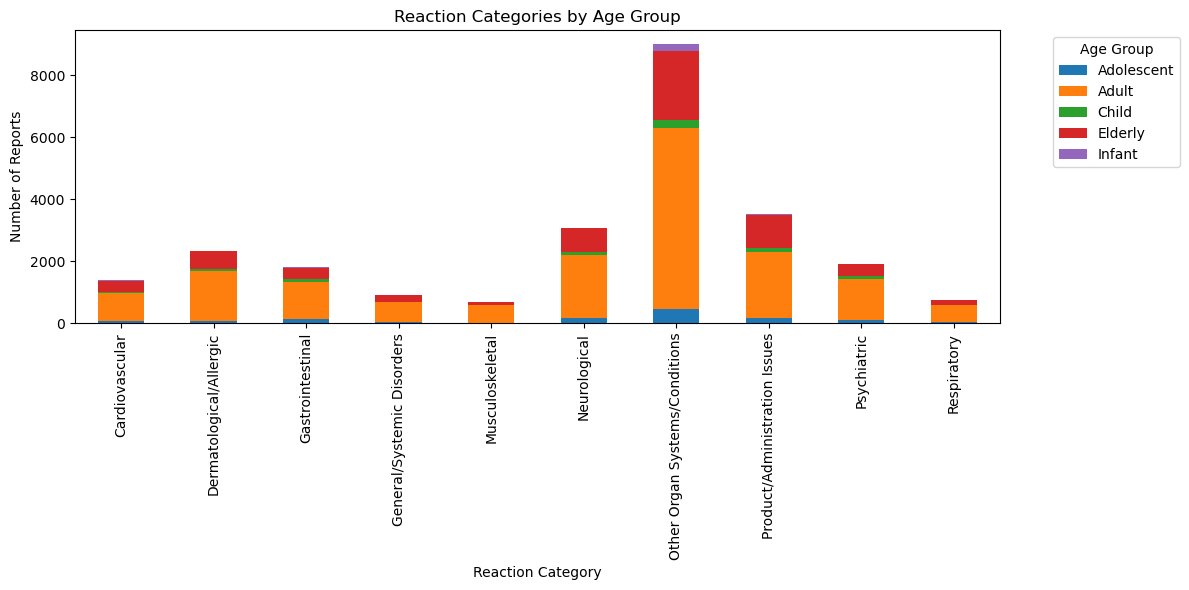

In [19]:
df2 = pd.read_sql(query2, engine)
pivot = df2.pivot_table(index='reaction_category', columns='age_group', values='count', aggfunc='sum').fillna(0)
pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Reaction Categories by Age Group')
plt.xlabel('Reaction Category')
plt.ylabel('Number of Reports')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Final Reaction Category By Age Group", dpi=300, bbox_inches='tight')
plt.show()


In [28]:
query3 ='''SELECT 
    fc.data_quarter as quarter,
    mfd.prod_ai,
    COUNT(*) AS report_count
 FROM 
        merged_faers_data_new mfd
    JOIN 
        faers_cases fc ON mfd.primaryid = fc.primaryid and fc.caseid = mfd.caseid
WHERE 
    mfd.prod_ai IN ('CETIRIZINE HYDROCHLORIDE', 'LORATADINE', 'FEXOFENADINE HYDROCHLORIDE')
GROUP BY 
    quarter, mfd.prod_ai
ORDER BY 
    quarter;
'''

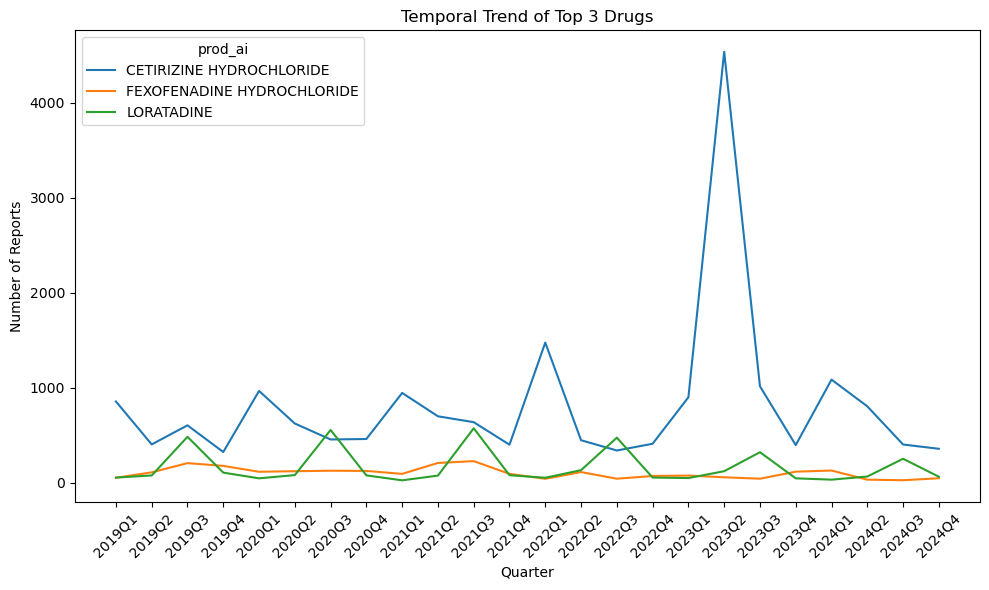

In [32]:
df3 = pd.read_sql(query3, engine)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df3, x='quarter', y='report_count', hue='prod_ai')
plt.title('Temporal Trend of Top 3 Drugs')
plt.xlabel('Quarter')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Final Temporal Trend of Top 3 Drugs", dpi=300, bbox_inches='tight')
plt.show()

In [38]:
query4 ='''SELECT 
    fc.data_quarter as quarter,
    mfd.reaction_category,
    COUNT(*) AS report_count
 FROM 
        merged_faers_data_new mfd
    JOIN 
        faers_cases fc ON mfd.primaryid = fc.primaryid and fc.caseid = mfd.caseid
GROUP BY 
    1,2
ORDER BY 
    1;
'''

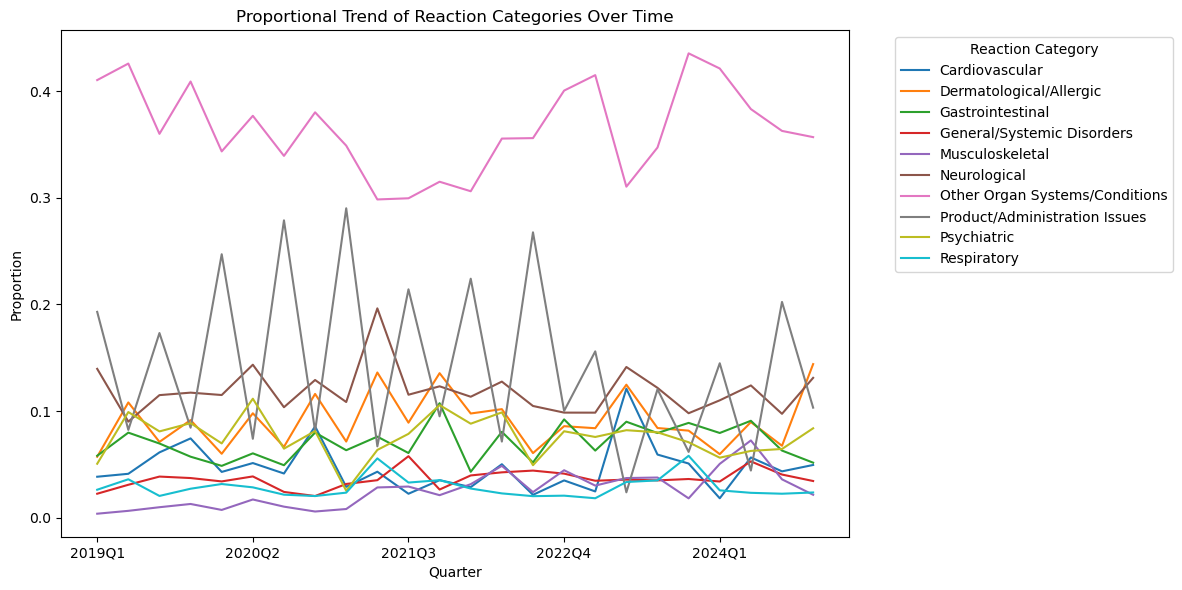

In [42]:
df4 =  pd.read_sql(query4, engine)
pivot_df = df4.pivot_table(index='quarter', columns='reaction_category', values='report_count', aggfunc='sum').fillna(0)
proportional_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)
proportional_df.plot(figsize=(12, 6))
plt.title('Proportional Trend of Reaction Categories Over Time')
plt.xlabel('Quarter')
plt.ylabel('Proportion')
plt.legend(title='Reaction Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Final Proportional Trend of Reaction Categories", dpi=300, bbox_inches='tight')
plt.show()